<a id='table'></a>

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> |</span></b> Table of contents</b></p>
</div>

* [1. Introduction](#Introduction)
* [2. Pima Indians Diabetes Database](#Data)
* [3. GAN model](#GAN)
* [4. Quality assessment](#Quality)
* [Conclusion](#Conclusion)


<a id='Introduction'></a>

# <b><span style='color:#F1A424'>| 1.</span> Introduction </b>

[Table of contents](#table)

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 1.1. </span></b> About the NoteBook </b></p>
</div>

[Table of contents](#table)

### Generative Adversarial Network
A Generative Adversarial Network (GAN) is a type of deep learning architecture composed of two neural networks: a generator and a discriminator. The generator is trained to generate new data samples that are similar to a given set of real data samples, while the discriminator is trained to distinguish between the generated samples and the real samples. The two networks are trained in a competition with each other where the generator tries to produce samples that are indistinguishable from the real samples and the discriminator tries to correctly identify whether a sample is real or generated.

### Code
In the following NoteBook, the generator is a neural network that takes a random noise vector as input and generates a sample of fake data. The discriminator is another neural network that takes a sample of either real or generated data as input and outputs a scalar indicating the probability that the sample is real. The generator and discriminator are trained together in an adversarial manner, where the generator tries to generate samples that are classified as real by the discriminator, and the discriminator tries to correctly identify whether a sample is real or generated. The generator and discriminator are trained iteratively, alternating between updating the generator and the discriminator, until they reach convergence and the generated samples become indistinguishable from the real samples.

https://samanemami.github.io/

In [43]:
import os
import logging
import numpy as np
import tensorflow as tf
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

tf.get_logger().setLevel(logging.ERROR)


<a id='Data'></a>

#  <b><span style='color:#F1A424'>| 2. </span> Tabular Data</b>


<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 2.1. </span></b> Pima Indians Diabetes Database </b></p>
</div>

[Table of contents](#table)



In [44]:
path = './part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
data = pd.read_csv(path)


def _df(data):
    df = pd.DataFrame(data)
    for c in range(df.shape[1]):
        mapping = {df.columns[c]: c}
        df = df.rename(columns=mapping)
    return df


X = (data.drop(columns=["label"])).values

In [45]:
# need to translate the y label first
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 문자열을 숫자로 매핑
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:", class_mapping)

Class Mapping: {'Backdoor_Malware': 0, 'BenignTraffic': 1, 'BrowserHijacking': 2, 'CommandInjection': 3, 'DDoS-ACK_Fragmentation': 4, 'DDoS-HTTP_Flood': 5, 'DDoS-ICMP_Flood': 6, 'DDoS-ICMP_Fragmentation': 7, 'DDoS-PSHACK_Flood': 8, 'DDoS-RSTFINFlood': 9, 'DDoS-SYN_Flood': 10, 'DDoS-SlowLoris': 11, 'DDoS-SynonymousIP_Flood': 12, 'DDoS-TCP_Flood': 13, 'DDoS-UDP_Flood': 14, 'DDoS-UDP_Fragmentation': 15, 'DNS_Spoofing': 16, 'DictionaryBruteForce': 17, 'DoS-HTTP_Flood': 18, 'DoS-SYN_Flood': 19, 'DoS-TCP_Flood': 20, 'DoS-UDP_Flood': 21, 'MITM-ArpSpoofing': 22, 'Mirai-greeth_flood': 23, 'Mirai-greip_flood': 24, 'Mirai-udpplain': 25, 'Recon-HostDiscovery': 26, 'Recon-OSScan': 27, 'Recon-PingSweep': 28, 'Recon-PortScan': 29, 'SqlInjection': 30, 'Uploading_Attack': 31, 'VulnerabilityScan': 32, 'XSS': 33}


In [46]:
y = (data["label"]).values

In [47]:
# We don't need this. we have everything filled.
# X = KNNImputer().fit_transform(X)

data = _df(StandardScaler().fit_transform(np.column_stack((X, y))))

<a id='GAN'></a>
#  <b><span style='color:#F1A424'>| 3. </span> Gan Model</b>

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 3.1. </span></b> GAN Class
 </b></p>
</div>

[Table of contents](#table)

#### how to implement a  <b><span style='color:#F1A424'>GAN </span></b> using TensorFlow and generate fake tabular data from real data;


* Define the generator model: The generator model is a neural network that takes a random noise vector as input and generates a sample of fake data. In this code, the generator model is defined using the Sequential class from TensorFlow and consists of two dense layers with ReLU activation.

* Define the discriminator model: The discriminator model is another neural network that takes a sample of either real or generated data as input and outputs a scalar indicating the probability that the sample is real. In this code, the discriminator model is also defined using the Sequential class from TensorFlow and consists of two dense layers with ReLU activation, followed by a single dense layer with a sigmoid activation.

* Define the combined model: The combined model is used to train the generator, and it consists of the generator and the discriminator connected together. The generator model is connected to the discriminator model by setting the discriminator to be non-trainable, which means that the gradients from the discriminator are not used to update its parameters during training.

* Load the real data: The code loads the real data from a .csv file using Pandas and converts it to a Numpy array.

* Train the GAN: The GAN is trained using a for-loop that trains the discriminator and the generator alternately. In each iteration, the discriminator is trained on a batch of real and generated data using discriminator.train_on_batch(X, labels), where X is a concatenation of real data and generated data, and labels is a vector indicating whether each sample is real or generated. The generator is then trained using the combined.train_on_batch(noise, np.ones(batch_size)) method, where noise is a random noise vector, and np.ones(batch_size) is a vector of ones with the same length as the batch size.

* Generate fake samples: After the GAN has been trained, the code generates fake samples by feeding random noise into the generator model using generator.predict(noise).

https://samanemami.medium.com/


In [48]:
# https://samanemami.github.io/
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)


class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 20

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(40, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(80, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(75, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(150, activation='relu'))
        # sigmoid => real or fake
        # model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

        # make it classify 34 labels using softmax and categorial entropy
        model.add(tf.keras.layers.Dense(34, activation='softmax'))
        # model.compile(loss='binary_crossentropy',
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        # model.compile(loss='binary_crossentropy', optimizer='adam')
        model.compile(loss='categorical_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    # def train(self, generator, discriminator, gan):

    #     # determine half the size of one batch, for updating the  discriminator
    #     # manually enumerate epochs
    #     for epoch in range(self.n_epochs):
            
    #         # Train the discriminator
    #         generated_data = generator.predict(self._noise())
    #         labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
    #         X = np.concatenate([self.data, generated_data])
    #         discriminator.trainable = True
    #         d_loss , _ = discriminator.train_on_batch(X, labels)

    #         # Train the generator
    #         noise = self._noise()
    #         g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))


    #         print('>%d, d1=%.3f, d2=%.3f\r' %(epoch+1, d_loss, g_loss))

    #     return generator

    def train(self, generator, discriminator, gan):

        # determine half the size of one batch, for updating the discriminator
        half_batch = int(self.data.shape[0])

        # manually enumerate epochs
        for epoch in range(self.n_epochs):
            
            # Train the discriminator
            generated_data = generator.predict(self._noise())

            # One-hot encode labels
            real_labels = np.ones((half_batch, 1))
            fake_labels = np.zeros((half_batch, 1))

            # Concatenate real and fake data for discriminator training
            X_discriminator = np.concatenate([self.data[:half_batch], generated_data[:half_batch]])
            y_discriminator = np.concatenate([real_labels, fake_labels])

            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X_discriminator, tf.keras.utils.to_categorical(y_discriminator, num_classes=34))

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, tf.keras.utils.to_categorical(np.ones(half_batch), num_classes=34))

            print('>%d, d=%.3f, g=%.3f\r' % (epoch+1, d_loss[0], g_loss))

        return generator


<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 3.2. </span></b> Generating synthetic data
 </b></p>
</div>

In [49]:
model = Gan(data=data)
generator = model._generator()
descriminator = model._discriminator()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model = model.train(
    generator=generator, discriminator=descriminator, gan=gan_model)

7459/7459 [==============================] - 3s 344us/step
>1, d=3.276, g=3.306
7459/7459 [==============================] - 2s 329us/step
>2, d=3.010, g=2.973
7459/7459 [==============================] - 2s 313us/step
>3, d=2.752, g=2.654
7459/7459 [==============================] - 3s 351us/step
>4, d=2.503, g=2.348
7459/7459 [==============================] - 3s 339us/step
>5, d=2.259, g=2.061
7459/7459 [==============================] - 2s 322us/step
>6, d=2.025, g=1.808
7459/7459 [==============================] - 2s 324us/step
>7, d=1.803, g=1.600
7459/7459 [==============================] - 2s 302us/step
>8, d=1.600, g=1.450
7459/7459 [==============================] - 2s 326us/step
>9, d=1.418, g=1.367
7459/7459 [==============================] - 2s 322us/step
>10, d=1.260, g=1.350
7459/7459 [==============================] - 2s 311us/step
>11, d=1.124, g=1.388
7459/7459 [==============================] - 2s 328us/step
>12, d=1.005, g=1.473
7459/7459 [==========================

In [50]:
noise = np.random.normal(0, 1, data.shape) 
new_data = _df(data=trained_model.predict(noise))

7459/7459 [==============================] - 2s 310us/step


In [51]:
new_data

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.127016,-0.412509,-1.363036,0.423571,-1.317706,-0.389970,-0.144584,0.981111,1.531425,-2.315370,...,0.482010,-0.494608,0.902673,1.316720,-0.143466,1.200974,-1.292905,-0.436101,-0.595934,-0.693102
1,-0.606560,-0.015107,-1.319899,-0.504634,-0.836971,-0.058811,-0.380860,0.509643,0.878512,-1.365442,...,0.966256,-0.706972,0.960582,-0.019798,-0.026404,1.181452,-1.011806,-0.459883,-0.210695,-0.606352
2,-0.260107,-0.123086,-1.140295,0.080453,-1.036001,-0.208541,-0.348242,0.789804,1.098824,-1.283032,...,0.502070,-0.554963,0.661684,0.164130,0.713518,0.458537,-0.661625,-0.090714,-1.152796,-1.014350
3,-0.143505,0.477989,-2.223103,0.442445,-1.146335,-0.014991,-1.152753,0.996394,2.762694,-2.040299,...,-0.112305,-0.439520,0.627792,2.019834,0.100910,0.208301,-0.301328,-0.801182,-1.234457,-0.532976
4,0.474731,-0.225442,-1.317063,-0.531493,-1.265346,-0.047029,-0.540522,-0.298811,1.065376,-1.605355,...,0.811372,-0.791493,1.391871,0.148088,-0.031161,0.590907,-1.111018,-0.252502,-0.126159,-0.149677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238682,0.949418,-0.320611,-1.176819,0.312845,-1.426847,-0.318720,-0.707394,-0.037643,1.178141,-1.223239,...,0.591238,-0.844534,1.334088,0.542845,0.413258,0.460345,-0.732715,-0.062538,-0.527903,-0.291216
238683,-0.037928,-0.370187,-1.520124,0.600701,-0.941855,0.451482,-1.154990,1.228001,1.035425,-1.291182,...,0.709874,-0.686523,0.425300,0.974496,0.338005,1.171376,-0.226084,-0.143169,-0.723422,-0.668290
238684,0.698213,0.437303,-2.025628,-0.186029,-1.443995,0.416143,-1.651743,1.857005,1.652936,-2.058828,...,0.146254,0.412071,0.803414,2.159913,-0.943777,1.428112,-0.636045,-1.721439,-0.065649,-0.274806
238685,0.283191,-0.014545,-1.163254,0.216031,-0.782991,0.747932,-0.492661,0.184619,0.786960,-0.464875,...,0.448269,-0.353477,-0.004173,0.390186,0.295543,0.253355,-0.407879,-0.746095,-0.302407,-0.205185


<a id='Quality'></a>

# <b><span style='color:#F1A424'>| 4.</span> Quality assessment </b>

[Table of contents](#table)

<div style="color:white;display:fill;border-radius:15px;
            font-size:150%;background-image: url(https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1200px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg);
            letter-spacing:1.0px">
    <p style="padding: 12px;color:white;"><b><b><span style='color:#F1A424'> | 4.1. </span></b> Check the quality of the generated synthetic data
 </b></p>
</div>

[Table of contents](#table)

Evaluating how well the GAN is able to generate new data that is similar to the data it was trained on. The quality can be evaluated based on various metrics, such as the visual similarity, diversity, and robustness of the generated data. The goal is to determine if the GAN is able to generate high-quality synthetic data.

https://samanemami.github.io/

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(170, 60))
sns.heatmap(data.corr(), annot=True, ax=ax[0], fmt = ".2f", cmap="Blues")
sns.heatmap(new_data.corr(), annot=True, ax=ax[1], fmt = ".2f", cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

Text(0.5, 1.0, 'synthetic Data')

Text(0.5, 1.0, 'synthetic Data')

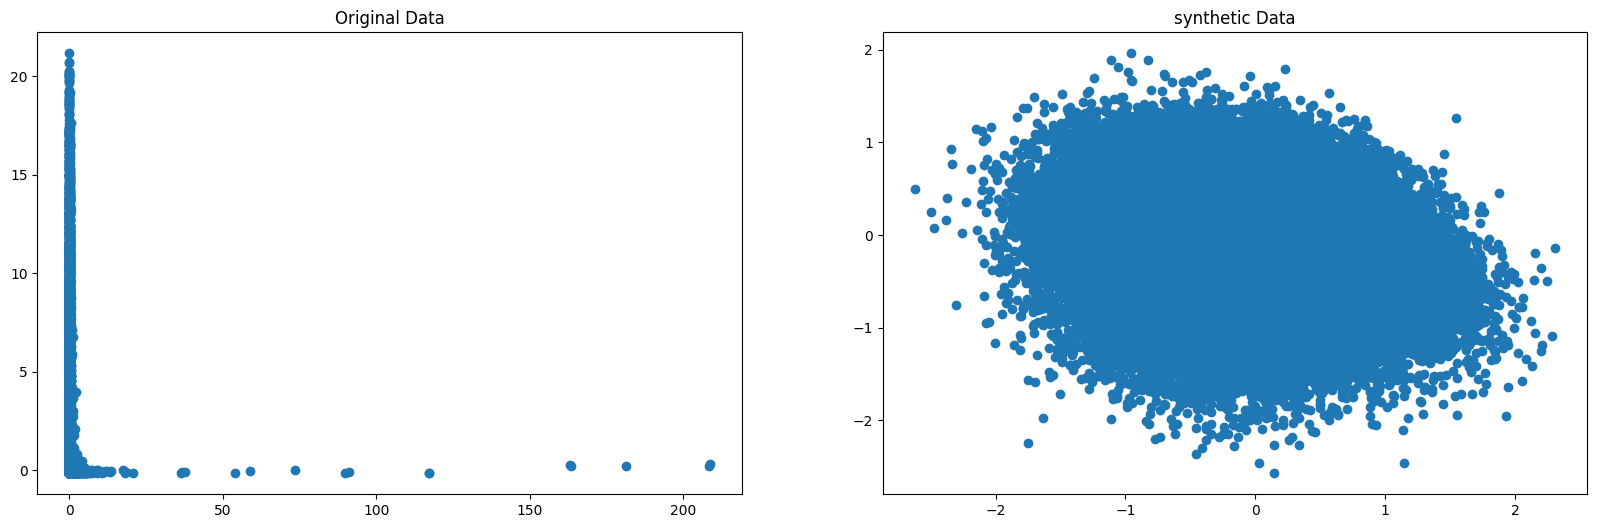

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(data.iloc[:, 0], data.iloc[:, 1])
ax[1].scatter(new_data.iloc[:, 0], new_data.iloc[:, 1])
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")

<a id='Conclusion'></a>

#  <b><span style='color:#F1A424'>| </span> Conclusion </b>

[Table of contents](#table)

Generative Adversarial Networks (GANs) are a powerful deep learning architecture that can be used to generate new data samples that are similar to a given set of real data samples. GANs consist of two neural networks: a generator and a discriminator, that are trained in an adversarial manner to produce realistic data. The code I provided is a simple example of how to implement a GAN in TensorFlow and generate fake tabular data from real data.